# SVR example

**Example using the svr function in the MLRegression module**

The **svr** function in the MLRegression module provides output of fitted regression model and summary statistics using the XGBoost function

The **svr** function standardizes the X input by default. 

This example shows how to cross-validate the model with independent training and testing data subsets before fitting the final model with all of the data.

#### Example data set

This example uses the diabetes data described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py


Before running this notebook, first install the MLRegression module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [1]:
# # Run the following commands to install MLRegression for the first time
# !pip install git+https://github.com/gjpelletier/MLRegression.git

# # Run the following commands to upgrade MLRegression to the latest versions
# !pip install git+https://github.com/gjpelletier/MLRegression.git --upgrade

## Read X and y from the sklearn diabetes data set

In [2]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)

## Split X and y into cross-validation train and test subsets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model with the training data subset

Fitting SVR model, please wait ...


SVR statistics of fitted model in model_outputs['stats']:


| Statistic   |        SVR |
|:------------|-----------:|
| r-squared   |   0.667984 |
| RMSE        |  44.9161   |
| n_samples   | 353        |


Done
Time elapsed: 0.24 sec


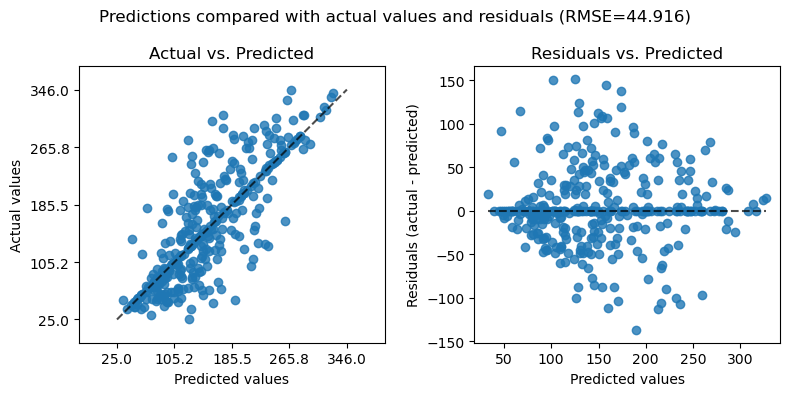

In [4]:
from MLRegression import svr
train_model, train_output = svr(X_train, y_train,
    C= 100, 
    epsilon= 0.01, 
    gamma='scale')

## Test the model with the testing data subset

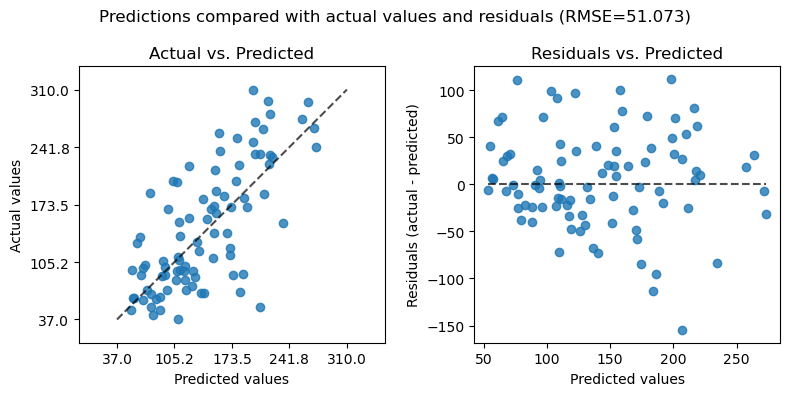

In [5]:
from MLRegression import plot_predictions_from_test
fig = plot_predictions_from_test(train_model, X_test, y_test, scaler=train_output['scaler'])
fig.savefig("LGBMRegressor_predictions_test.png", dpi=300)

## Final fit of the model using all of the X and y data

Fitting SVR model, please wait ...


SVR statistics of fitted model in model_outputs['stats']:


| Statistic   |        SVR |
|:------------|-----------:|
| r-squared   |   0.665267 |
| RMSE        |  44.5525   |
| n_samples   | 442        |


Done
Time elapsed: 0.26 sec


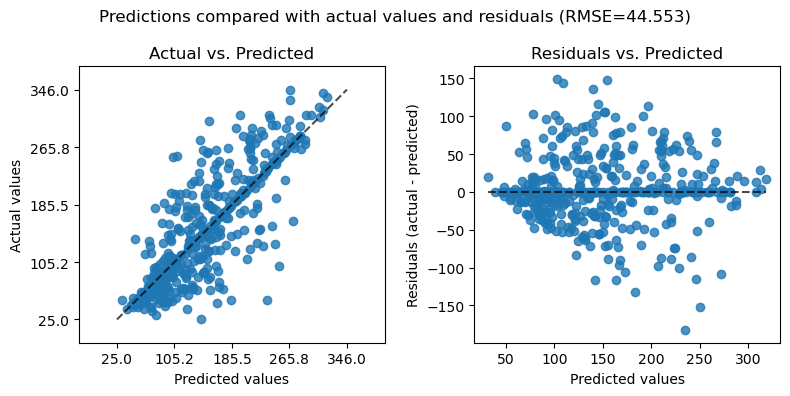

In [6]:
from MLRegression import svr
final_model, final_output = svr(X, y,
    C= 100, 
    epsilon= 0.01, 
    gamma='scale')

## User instructions

In [7]:
help(svr)

Help on function svr in module MLRegression:

svr(X, y, **kwargs)
    Python function for SVR linear regression
    Beta version

    by
    Greg Pelletier
    gjpelletier@gmail.com
    30-May-2025

    REQUIRED INPUTS (X and y should have same number of rows and
    only contain real numbers)
    X = dataframe of the candidate independent variables
        (as many columns of data as needed)
    y = dataframe of the dependent variable (one column of data)

    OPTIONAL KEYWORD ARGUMENTS
    **kwargs (optional keyword arguments):
        standardize= 'on' (default) or 'off' where
            'on': standardize X using sklearn.preprocessing StandardScaler
            'off': do not standardize X (only used if X is already standardized)
        standardize= 'on' (default) or 'off'
        verbose= 'on' (default) or 'off'
        kernel= 'rbf'      # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
                           # or callable, default=’rbf’
        degree= 3          # int, d